In [1]:
import pandas as pd
import seaborn as sns
from sklearn import tree
%matplotlib inline
import imageio
import matplotlib.pyplot as plt
import matplotlib.cbook
from sklearn.metrics import precision_score, recall_score,accuracy_score,roc_auc_score,classification_report,f1_score
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Step1. [Understand Data]. 

In [3]:
df = pd.read_csv("Employee_Hopping.csv")

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.shape

(1470, 35)

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
df.value_counts

<bound method DataFrame.value_counts of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education E

In [10]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Step2. [Extract X and y ]. 

In [11]:
X = df.drop(['Attrition'],axis=1)
y = df.Attrition

In [12]:
y = y.apply(lambda x:1 if x == 'Yes' else 0)

In [13]:
df.select_dtypes(include=['object']).dtypes

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

### Step3. [Feature Engineering] 

In [14]:
df=pd.get_dummies(df,columns=["BusinessTravel","Department",'EducationField',"Gender","JobRole","MaritalStatus","Over18","OverTime"])
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,Yes,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,No,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,Yes,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,No,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,No,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0


### Step4. Now, check shape of X and y.

In [15]:
X = df.drop(['Attrition'],axis=1)
X.shape

(1470, 55)

In [16]:
y.shape

(1470,)

### Step5. [Model Development] 

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [18]:
seed = 0
rfc = RandomForestClassifier(n_estimators=1000, max_features=0.3, max_depth=4, min_samples_leaf=2, n_jobs=-1, random_state=seed ,warm_start=True, verbose=0)

In [19]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, max_features=0.3, min_samples_leaf=2,
                       n_estimators=1000, n_jobs=-1, random_state=0,
                       warm_start=True)

In [20]:
y_pred=rfc.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

### Step6. [Testing] 


In [21]:
accuracy_score(y_test,y_pred)

0.8639455782312925

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       371
           1       0.86      0.17      0.29        70

    accuracy                           0.86       441
   macro avg       0.86      0.58      0.61       441
weighted avg       0.86      0.86      0.82       441



### Step7. [Feature importance value] 

In [23]:
print(rfc.feature_importances_)

[6.98321450e-02 3.65227658e-02 2.00159132e-02 5.21457627e-03
 0.00000000e+00 1.93136701e-02 3.09477993e-02 2.51635390e-02
 1.66715720e-02 5.04884918e-02 1.37024559e-02 1.15212766e-01
 1.89715997e-02 1.83688986e-02 1.16183893e-02 6.52783762e-04
 9.05995065e-03 0.00000000e+00 2.83057741e-02 6.73115246e-02
 5.96985891e-03 1.88628396e-02 5.02462199e-02 1.64563675e-02
 8.78154018e-03 4.70126629e-02 3.99898213e-03 1.62801031e-02
 2.47672036e-03 5.60666617e-04 3.92298011e-03 4.67197125e-03
 2.85590037e-03 1.92092323e-03 3.48874178e-03 2.75324633e-03
 3.67258786e-04 4.33772973e-03 1.65455825e-03 1.66961888e-03
 3.66392947e-04 7.05642476e-04 4.35437163e-03 3.37746500e-04
 1.17707045e-03 6.70465871e-05 4.98737913e-03 6.52221544e-03
 1.25986442e-02 2.39045147e-03 3.31770313e-03 2.24531725e-02
 0.00000000e+00 9.21168370e-02 9.29418217e-02]


In [24]:
feature_imp = pd.DataFrame(rfc.feature_importances_,index=X_train.columns,columns=['Important score']).sort_values(by='Important score',ascending=False)
feature_imp

,Important score
MonthlyIncome,0.115213
OverTime_Yes,0.092942
OverTime_No,0.092117
Age,0.069832
TotalWorkingYears,0.067312
JobLevel,0.050488
YearsAtCompany,0.050246
YearsWithCurrManager,0.047013
DailyRate,0.036523
EnvironmentSatisfaction,0.030948


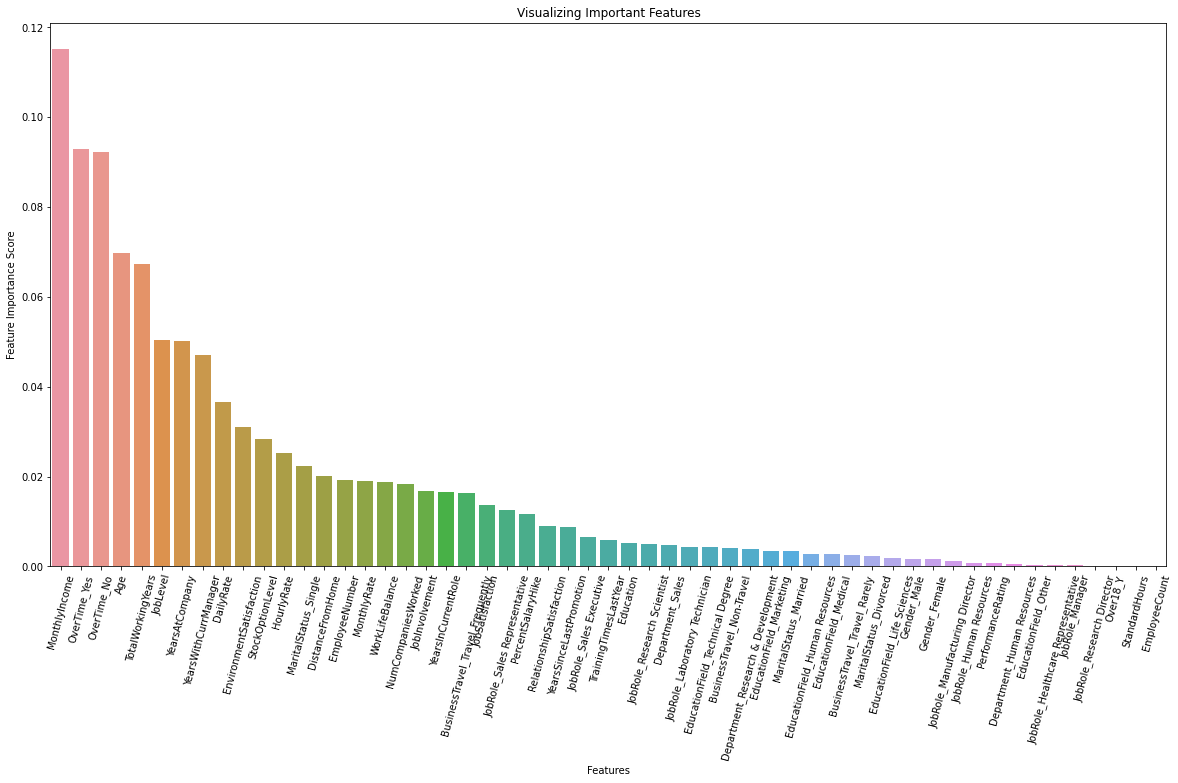

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(x=feature_imp.index, y=feature_imp['Important score'])
# Add labels to your graph

plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.title("Visualizing Important Features")
plt.xticks(rotation=75)
plt.show()

### Step8. [Visualize your RF Decision Tree using graphviz]

http://www.webgraphviz.com/. 

In [26]:
estimator = rfc.estimators_[7]

In [27]:
export_graphviz(estimator,out_file='rtree1.txt',feature_names = X_train.columns.values,class_names = ['yes','no'],max_depth=4,impurity=False,filled = True)

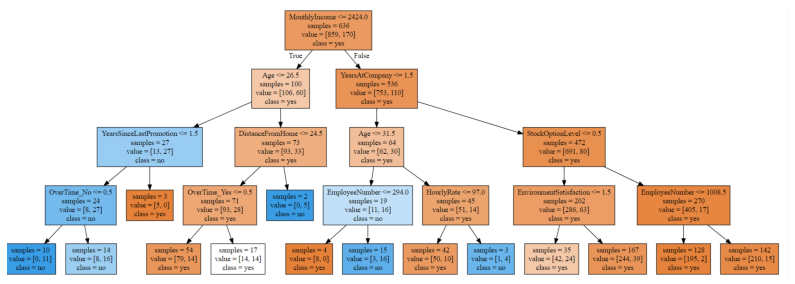

In [28]:
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('rtree1.png'))
plt.axis('off');
plt.show();

### Step9. [RF with a range of trees] 

In [29]:
rf2 = RandomForestClassifier(oob_score=True,random_state=42,warm_start=True,n_jobs=-1)
oob_list = list()
# Iterate through all of the possibilities for number of trees

for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    rf2.set_params(n_estimators=n_trees)
    rf2.fit(X_train, y_train)

    # Get the oob error

    oob_error = 1 - rf2.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')
rf_oob_df

,oob
n_trees,
15.0,0.172012
20.0,0.163265
30.0,0.152575
40.0,0.151603
50.0,0.145773
100.0,0.147716
150.0,0.143829
200.0,0.149660
300.0,0.148688


### Step11.[Plot oob-error for each tree]

[Text(0, 0.5, 'out-of-bag error')]

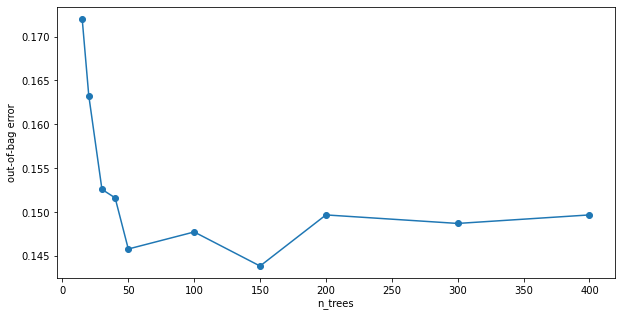

In [30]:
ax = rf_oob_df.plot(legend=False, marker='o', figsize=(10,5))
ax.set(ylabel='out-of-bag error')

### Step11. [Compare with DecisionTreeClassifier] 

In [31]:
clf_1 = DecisionTreeClassifier(criterion='gini',max_depth=4, random_state=42)

In [32]:
clf_1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [33]:
y_pred1=clf_1.predict(X_test)
y_pred1

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [34]:
with open("rtree2.txt", 'w') as f:
    f = tree.export_graphviz(clf_1,out_file=f,max_depth = 4,impurity = False,feature_names = X_train.columns.values,class_names = ['yes','no'],filled= True )

http://www.webgraphviz.com/. 

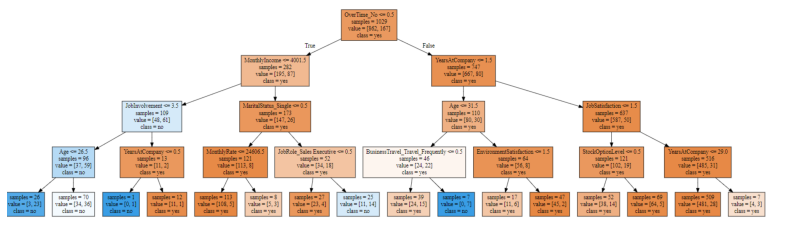

In [35]:
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('rtree2.png'))
plt.axis('off');
plt.show();

In [36]:
accuracy_score(y_test,y_pred1)

0.8480725623582767

In [37]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       371
           1       0.53      0.39      0.45        70

    accuracy                           0.85       441
   macro avg       0.71      0.66      0.68       441
weighted avg       0.83      0.85      0.84       441



In [38]:
print("RF model:      ",accuracy_score(y_test,y_pred))
print("RF Precision:  ",precision_score(y_test,y_pred))
print("RF Recall:     ",recall_score(y_test,y_pred))
print("RF F1 score:   ",f1_score(y_test,y_pred))
print("\n")
print("DT model:      ",accuracy_score(y_test,y_pred1))
print("DT Precision:  ",precision_score(y_test,y_pred1))
print("DT Recall:     ",recall_score(y_test,y_pred1))
print("DT F1 score:   ",f1_score(y_test,y_pred1))

RF model:       0.8639455782312925
RF Precision:   0.8571428571428571
RF Recall:      0.17142857142857143
RF F1 score:    0.2857142857142857


DT model:       0.8480725623582767
DT Precision:   0.5294117647058824
DT Recall:      0.38571428571428573
DT F1 score:    0.4462809917355372
